<a href="https://colab.research.google.com/github/hatrg01/GATCLML/blob/main/GATMetricLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
torchversion = torch.__version__
!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-{torchversion}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-{torchversion}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 89.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 42.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Getting Wang dataset

In [ ]:
!unzip /content/drive/MyDrive/DATA/wangdataset.zip

Archive:  /content/drive/MyDrive/DATA/wangdataset.zip
  inflating: Images/0.jpg            
  inflating: Images/1.jpg            
  inflating: Images/10.jpg           
  inflating: Images/100.jpg          
  inflating: Images/101.jpg          
  inflating: Images/102.jpg          
  inflating: Images/103.jpg          
  inflating: Images/104.jpg          
  inflating: Images/105.jpg          
  inflating: Images/106.jpg          
  inflating: Images/107.jpg          
  inflating: Images/108.jpg          
  inflating: Images/109.jpg          
  inflating: Images/11.jpg           
  inflating: Images/110.jpg          
  inflating: Images/111.jpg          
  inflating: Images/112.jpg          
  inflating: Images/113.jpg          
  inflating: Images/114.jpg          
  inflating: Images/115.jpg          
  inflating: Images/116.jpg          
  inflating: Images/117.jpg          
  inflating: Images/118.jpg          
  inflating: Images/119.jpg          
  inflating: Images/12.jpg        

In [ ]:
import os
import cv2
def get_img(datadir):
  data =[]
  names = []
  try:
    img_names = os.listdir(datadir)
    for i in img_names:
      imgdir = datadir + i
      try:
        img = cv2.imread(imgdir)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # img = cv2.resize(img, (200,200))
        data.append(img)
        names.append(i)
      except AttributeError:
        print('No image')
  except AttributeError:
    print('No folder')
  return data, names

In [ ]:
datadir = './wangdataset/Images/'
img_name = os.listdir(datadir)
images, names = get_img(datadir)
len(images), len(names)

(1000, 1000)

In [ ]:
categories = ['Africa', 'Beach', 'Ancient Architecture', 'Bus', 'Dinosaur', 'Elephant', 'Flower', 'Horse', 'Mountain', 'Food']
labels = []
for i in names:
  label = int(i[:-4])//100
  labels.append(label)

KeyboardInterrupt: 

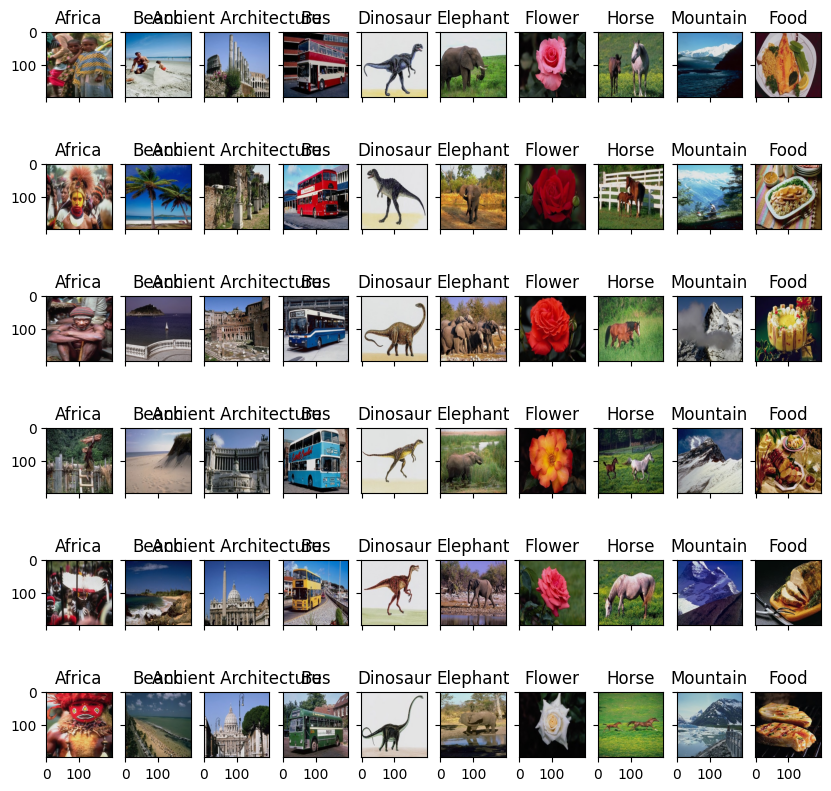

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=6, ncols=10, sharex=True, sharey=True, figsize=(10, 10))
k = 0
for i in range(6):
  for j in range(10):
    name = j * 100 + k
    img = cv2.imread('./wangdataset/Images/' + str(name) + '.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (200,200))
    ax[i][j].imshow(img)
    ax[i][j].set_title(categories[name//100])
    k += 1
plt.tight_layout()

# Getting cifar100 dataset

In [ ]:
!unzip /content/drive/MyDrive/DATA/CIFARv2.zip

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: CIFARv2/train/train/vehicles_1__train__0010.png  
  inflating: CIFARv2/train/train/vehicles_1__train__0011.png  
  inflating: CIFARv2/train/train/vehicles_1__train__0012.png  
  inflating: CIFARv2/train/train/vehicles_1__train__0013.png  
  inflating: CIFARv2/train/train/vehicles_1__train__0014.png  
  inflating: CIFARv2/train/train/vehicles_1__train__0015.png  
  inflating: CIFARv2/train/train/vehicles_1__train__0016.png  
  inflating: CIFARv2/train/train/vehicles_1__train__0017.png  
  inflating: CIFARv2/train/train/vehicles_1__train__0018.png  
  inflating: CIFARv2/train/train/vehicles_1__train__0019.png  
  inflating: CIFARv2/train/train/vehicles_1__train__0020.png  
  inflating: CIFARv2/train/train/vehicles_1__train__0021.png  
  inflating: CIFARv2/train/train/vehicles_1__train__0022.png  
  inflating: CIFARv2/train/train/vehicles_1__train__0023.png  
  inflating: CIFARv2/train/train/vehicles_1__train__0024.png 

In [ ]:
import os
import cv2
def get_img(datadir):
  data =[]
  labels = []

  for i in range(len(categories)):
    labeldir = datadir + categories[i] + '/'
    img_name = os.listdir(labeldir)
    for j in img_name:
      imgdir = labeldir + j
      try:
        img = cv2.imread(imgdir)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        data.append(img)
        labels.append(i)
      except AttributeError:
        print('No image')
  return data, labels

In [ ]:
datadir = './CIFARv2/train/'
try:
  categories = os.listdir(datadir)
except AttributeError:
  print('No folder')

images, labels = get_img(datadir)
len(images), len(labels)

(50000, 50000)

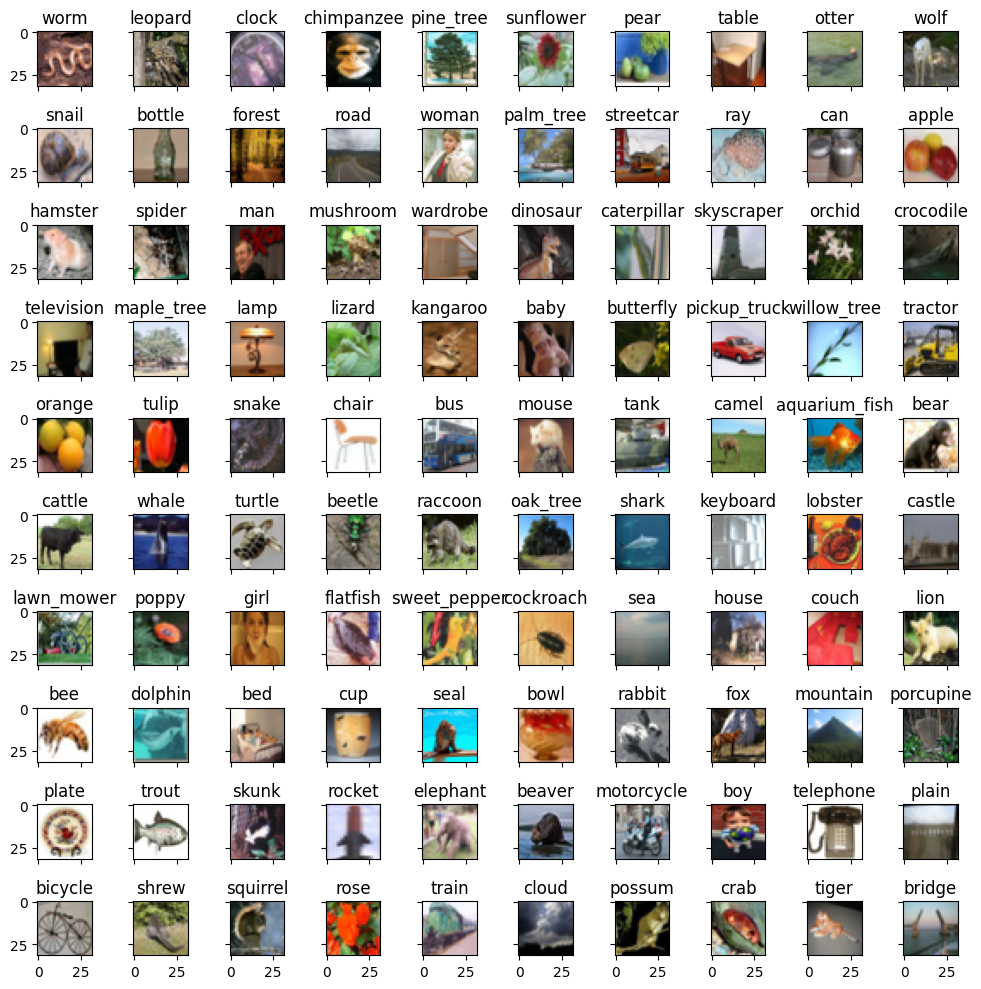

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=10, ncols=10, sharex=True, sharey=True, figsize=(10, 10))
k = 0
for i in range(10):
  for j in range(10):
    index = k*500
    img = images[index]
    ax[i][j].imshow(img)
    ax[i][j].set_title(categories[labels[index]])
    k += 1
plt.tight_layout()

# Generating graph

In [ ]:
from skimage.measure import regionprops
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.future import graph
def generate_graph(image, n_segments):
  segments = slic(image, n_segments=n_segments, compactness=30)
  g = graph.RAG(segments, connectivity=2)
  props = regionprops(segments, image)
  return segments, g, props

In [ ]:
n_segments = 50
segmentation_slic = []
img_graphs = []
img_props = []
for i in images:
  segments, g, props = generate_graph(i, n_segments)
  segmentation_slic.append(segments)
  img_graphs.append(g)
  img_props.append(props)

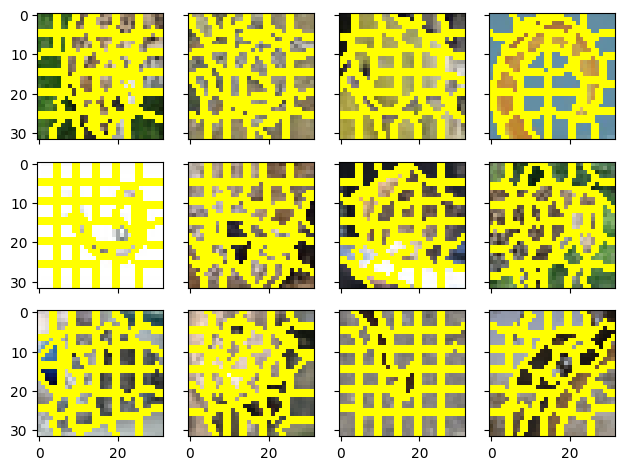

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=3, ncols=4, sharex=True, sharey=True)
ax[0][0].imshow(mark_boundaries(images[547], segmentation_slic[547]))
ax[0][1].imshow(mark_boundaries(images[101], segmentation_slic[101]))
ax[0][2].imshow(mark_boundaries(images[201], segmentation_slic[201]))
ax[0][3].imshow(mark_boundaries(images[311], segmentation_slic[311]))
ax[1][0].imshow(mark_boundaries(images[401], segmentation_slic[401]))
ax[1][1].imshow(mark_boundaries(images[501], segmentation_slic[501]))
ax[1][2].imshow(mark_boundaries(images[601], segmentation_slic[601]))
ax[1][3].imshow(mark_boundaries(images[701], segmentation_slic[701]))
ax[2][0].imshow(mark_boundaries(images[801], segmentation_slic[801]))
ax[2][1].imshow(mark_boundaries(images[901], segmentation_slic[901]))
ax[2][2].imshow(mark_boundaries(images[357], segmentation_slic[357]))
ax[2][3].imshow(mark_boundaries(images[791], segmentation_slic[791]))
plt.tight_layout()

In [ ]:
def encode_edges(g):
  E = [[], []]
  for i, j in g.edges():
    E[0].append(i-1)
    E[0].append(j-1)
    E[1].append(j-1)
    E[1].append(i-1)
  return E

In [ ]:
edges = []
for i in range(len(img_graphs)):
  edge_index = encode_edges(img_graphs[i])
  edges.append(edge_index)
len(edges)

50000

In [ ]:
import numpy as np
from skimage import color, util, feature

NUM_FEATURES = 96
def feature_extraction(segmentation, image):
  props = regionprops(segmentation, image)
  features = np.zeros((max(np.unique(segmentation)), NUM_FEATURES), dtype=np.float32)
  gray_image = util.img_as_ubyte(color.rgb2gray(image))

  for i, prop in enumerate(props):
    segment_mask = segmentation == i

    features[i][0:16] = prop['moments'].flatten()

    bbox = prop['bbox']
    features[i][16] = bbox[2] - bbox[0]
    features[i][17] = bbox[3] - bbox[1]

    features[i][18] = prop['area_convex']
    features[i][19] = prop['perimeter']

    features[i][20:23] = prop['intensity_mean']
    features[i][23:26] = prop['intensity_max']
    features[i][26:29] = prop['intensity_min']

    # features[i][29:31] = prop['centroid_local']
    features[i][29:35] = prop['centroid_weighted_local'].flatten()

    # features[i][37] = prop['orientation']
    # features[i][38] = prop['feret_diameter_max']
    features[i][35] = prop['extent']
    # features[i][40] = prop['solidity']

    features[i][35:83] = prop['moments_weighted_central'].flatten()
    features[i][83:90] = prop['moments_hu'].flatten()

    glcm = feature.graycomatrix(gray_image*segment_mask, distances=[5], angles=[0], levels=256, symmetric=True, normed=True)
    features[i][90] = feature.graycoprops(glcm, prop='ASM')
    features[i][91] = feature.graycoprops(glcm, prop='contrast')
    features[i][92] = feature.graycoprops(glcm, prop='dissimilarity')
    features[i][93] = feature.graycoprops(glcm, prop='homogeneity')
    features[i][94] = feature.graycoprops(glcm, prop='energy')
    features[i][95] = feature.graycoprops(glcm, prop='correlation')

  return features

In [ ]:
max(segmentation_slic[3].reshape(-1))

36

In [ ]:
node_features = []
for i in range(len(images)):
  segmentation_feature = feature_extraction(segmentation_slic[i], images[i])
  node_features.append(segmentation_feature)

<ipython-input-18-d09c246330d4>:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  features[i][90] = feature.graycoprops(glcm, prop='ASM')
<ipython-input-18-d09c246330d4>:39: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  features[i][91] = feature.graycoprops(glcm, prop='contrast')
<ipython-input-18-d09c246330d4>:40: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  features[i][92] = feature.graycoprops(glcm, prop='dissimilarity')
<ipython-input-18-d09c246330d4>:41: Depr

In [ ]:
# import json
# def dumps_json(output_file ,names, node_features, edges, labels):
#     t = []
#     for i in range(len(node_features)):
#         d = {'name':names[i], 'node': node_features[i].tolist(), 'edge': edges[i], 'label': labels[i]}
#         t.append(d)
#     with open(output_file, 'w') as output:
#         output.write(json.dumps(t))

In [ ]:
# dumps_json('/content/drive/MyDrive/DATN/wangdataset_graph_features.json', names, node_features, edges, labels)

In [ ]:
from torch_geometric.data import Data
def prepare_data(node_features, edges, label):
  x = torch.tensor(node_features)
  edge_index = torch.tensor(edges, dtype=torch.long)
  d = Data(x=x, edge_index=edge_index, y=label)
  return d

In [ ]:
D = []
for i in range(len(node_features)):
  d = prepare_data(node_features[i], edges[i], labels[i])
  D.append(d)
len(D), D[0].x.size(),  D[0].edge_index.size(), D[0].x.dtype

(50000, torch.Size([35, 96]), torch.Size([2, 164]), torch.float32)

# Training model

In [ ]:
import torch
from torch_geometric.data import Dataset, DataLoader

class CustomDataset(Dataset):
  def __init__(self, data_list):
    super().__init__()
    self.data_list = data_list

  def len(self):
    return len(self.data_list)

  def get(self, idx):
    return self.data_list[idx]

batch_size = 64
dataset = CustomDataset(D)
dataset.shuffle()

train_dataset = dataset[:800]
test_dataset = dataset[800:]

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=True)

for step, data in enumerate(train_dataloader):
  print(f'Step {step + 1}:')
  print('=======')
  print(f'Number of graphs in the current batch: {data.num_graphs}')
  print(data)
  print()


Step 1:
Number of graphs in the current batch: 64
DataBatch(x=[2241, 96], edge_index=[2, 11380], y=[64], batch=[2241], ptr=[65])

Step 2:
Number of graphs in the current batch: 64
DataBatch(x=[2261, 96], edge_index=[2, 11438], y=[64], batch=[2261], ptr=[65])

Step 3:
Number of graphs in the current batch: 64
DataBatch(x=[2251, 96], edge_index=[2, 11456], y=[64], batch=[2251], ptr=[65])

Step 4:
Number of graphs in the current batch: 64
DataBatch(x=[2262, 96], edge_index=[2, 11544], y=[64], batch=[2262], ptr=[65])

Step 5:
Number of graphs in the current batch: 64
DataBatch(x=[2263, 96], edge_index=[2, 11634], y=[64], batch=[2263], ptr=[65])

Step 6:
Number of graphs in the current batch: 64
DataBatch(x=[2257, 96], edge_index=[2, 11444], y=[64], batch=[2257], ptr=[65])

Step 7:
Number of graphs in the current batch: 64
DataBatch(x=[2254, 96], edge_index=[2, 11436], y=[64], batch=[2254], ptr=[65])

Step 8:
Number of graphs in the current batch: 64
DataBatch(x=[2237, 96], edge_index=[2, 1

/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [ ]:
for gr in D:
  print(gr.x)

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
          9.4225e-01, -2.9792e-02],
        ...,
        [ 3.0000e+01,  6.0000e+01,  1.8000e+02,  ...,  9.6412e-01,
          9.6414e-01, -1.7649e-02],
        [ 3.1000e+01,  6.6000e+01,  2.1400e+02,  ...,  9.6528e-01,
          9.6529e-01, -1.6911e-02],
        [ 3.0000e+01,  1.2200e+02,  6.5600e+02,  ...,  9.3115e-01,
          9.3061e-01,  5.5184e-02]])
tensor([[4.0000e+01, 1.3100e+02, 6.2300e+02,  ..., 1.0000e+00, 1.0000e+00,
         1.0000e+00],
        [2.6000e+01, 7.5000e+01, 2.8500e+02,  ..., 9.5384e-01, 9.5372e-01,
         3.7302e-01],
        [2.8000e+01, 7.0000e+01, 2.5000e+02,  ..., 9.4354e-01, 9.4335e-01,
         9.4078e-02],
        ...,
        [3.5000e+01, 9.0000e+01, 3.3000e+02,  ..., 9.5494e-01, 9.5488e-01,
         2.1452e-01],
        [2.9000e+01, 9.9000e+01, 4.4100e+02,  ..., 9.2490e-01, 9.2486e-01,
         1.1544e-01],
        [2.2000e+01, 8.9000e+01, 4.7900e+02,  ..., 9.4066e-01, 9.3985e-01,
         1.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATv2Conv, global_mean_pool, global_max_pool
from torch_geometric.data import Data, Batch
from torch_geometric.loader import DataLoader

class CenterLoss(nn.Module):
  def __init__(self, num_classes, feat_dim, alpha=0.5):
    super(CenterLoss, self).__init__()
    self.num_classes = num_classes
    self.feat_dim = feat_dim
    self.alpha = alpha
    self.centers = nn.Parameter(torch.randn(num_classes, feat_dim))

  def forward(self, x, labels):
    unique_labels = torch.unique(labels)
    for label in unique_labels:
      mask = labels == label
      class_embeddings = x[mask]
      center = torch.mean(class_embeddings, dim=0)
      new_centers = self.centers.clone()
      new_centers[label] = center
      self.centers = nn.Parameter(new_centers)

    centers_batch = torch.index_select(torch.tensor(self.centers), dim=0, index=labels)
    center_loss = torch.mean(torch.norm(x - centers_batch, p=2, dim=1))
    return self.alpha * center_loss

class GATMetricLearningNetwork(nn.Module):
  def __init__(self, in_features, hidden_dim, out_features, num_classes, num_heads, concat=True, dropout=0.2):
    super(GATMetricLearningNetwork, self).__init__()

    self.gat = nn.Sequential(
      GATv2Conv(in_features, hidden_dim, heads=num_heads, concat=True, dropout=dropout),
      GATv2Conv(num_heads * hidden_dim, hidden_dim, heads=num_heads, concat=True, dropout=dropout),
      GATv2Conv(num_heads * hidden_dim, hidden_dim, heads=1, concat=False)
    )

    self.metric_learning = nn.Sequential(
      nn.Linear(hidden_dim, 512),
      nn.ELU(),
      nn.Dropout(dropout),
      # nn.Linear(1024, 256),
      # nn.ELU(),
      # nn.Dropout(dropout),
      nn.Linear(512, out_features),
      nn.ELU()
    )

    self.classifier = nn.Linear(out_features, num_classes)

  def forward(self, x, edge_index, batch):
    for layer in self.gat:
      x = layer(x, edge_index)
      x = F.elu(x)
    h = global_max_pool(x, batch=batch)
    embedding = self.metric_learning(h.view(h.size(0), -1))
    logits = self.classifier(embedding)
    return embedding, logits


in_features = NUM_FEATURES
hidden_dim = 128
out_features = 64
num_classes = 10
num_heads = 8
learning_rate = 0.001
alpha = 0.5
num_epochs = 20

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = GATMetricLearningNetwork(in_features=in_features, hidden_dim=hidden_dim, out_features=out_features, num_classes=num_classes, num_heads=num_heads)

cross_entropy_loss = nn.CrossEntropyLoss()
center_loss = CenterLoss(num_classes, out_features)

model.to(device)
center_loss.to(device)

optimizer = torch.optim.Adam([
  {'params': model.gat.parameters()},
  {'params': model.metric_learning.parameters()},
  {'params': model.classifier.parameters()},
  {'params': center_loss.parameters(), 'lr': 0.005}],
  lr=learning_rate
)


# def train(model, train_loader, valid_data, valid_labels, cross_entropy_loss, center_loss, optimizer, device):
def train(model, train_loader, cross_entropy_loss, center_loss, optimizer, device):
  model.train()
  total_cross_entropy_loss = 0.0
  total_center_loss = 0.0
  total_loss = 0.0
  train_correct = 0
  train_total = 0
  # valid_correct = 0
  # valid_total = 0

  for data in train_loader:
    data = data.to(device)
    labels = data.y
    optimizer.zero_grad()

    features, logits = model(data.x, data.edge_index, data.batch)
    total_cross_entropy_loss = cross_entropy_loss(logits, labels)
    total_center_loss = center_loss(features, labels)

    total_loss = total_cross_entropy_loss + total_center_loss

    total_loss.backward()
    optimizer.step()

    _, train_predicted = torch.max(logits, 1)
    # print(train_predicted)
    # print(labels)
    train_total += labels.size(0)
    train_correct += (train_predicted == labels).sum().item()

  train_accuracy = train_correct / train_total

  return total_cross_entropy_loss, total_center_loss, total_loss, train_accuracy

for epoch in range(num_epochs):
  total_cross_entropy_loss, total_center_loss, total_loss, train_accuracy = train(model, train_dataloader, cross_entropy_loss, center_loss, optimizer, device)
  print(f"Epoch {epoch + 1}/{num_epochs} => "
        f"Cross Entropy Loss: {total_cross_entropy_loss:.4f}, "
        f"Center Loss: {total_center_loss:.4f}, "
        f"Total Loss: {total_loss:.4f}, "
        f"Train Accuracy: {train_accuracy:.10f}")

<ipython-input-26-2c8351d84832>:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  centers_batch = torch.index_select(torch.tensor(self.centers), dim=0, index=labels)


Epoch 1/20 => Cross Entropy Loss: 2.0804, Center Loss: 0.0562, Total Loss: 2.1367, Train Accuracy: 0.3787500000
Epoch 2/20 => Cross Entropy Loss: 1.7259, Center Loss: 0.0642, Total Loss: 1.7901, Train Accuracy: 0.6250000000
Epoch 3/20 => Cross Entropy Loss: 1.2320, Center Loss: 0.0767, Total Loss: 1.3087, Train Accuracy: 0.6250000000
Epoch 4/20 => Cross Entropy Loss: 0.9694, Center Loss: 0.0983, Total Loss: 1.0677, Train Accuracy: 0.6250000000
Epoch 5/20 => Cross Entropy Loss: 0.7286, Center Loss: 0.1075, Total Loss: 0.8361, Train Accuracy: 0.6250000000
Epoch 6/20 => Cross Entropy Loss: 0.7936, Center Loss: 0.1188, Total Loss: 0.9123, Train Accuracy: 0.6250000000
Epoch 7/20 => Cross Entropy Loss: 0.6706, Center Loss: 0.1287, Total Loss: 0.7993, Train Accuracy: 0.6250000000
Epoch 8/20 => Cross Entropy Loss: 0.7088, Center Loss: 0.1193, Total Loss: 0.8281, Train Accuracy: 0.6250000000
Epoch 9/20 => Cross Entropy Loss: 0.6274, Center Loss: 0.1223, Total Loss: 0.7497, Train Accuracy: 0.625